In [272]:
# https://www.youtube.com/watch?v=gSYiKKoREFI
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import os
import seaborn as sns
import tensorflow as tf

In [273]:
org_list = []

for i in range(15):
    temp_df = pd.read_csv(f"E:\Data_warehouse\contest_data/org_{i+1}.csv")
    columns = [('org_{}'.format(i + 1), col) for col in temp_df.columns]
    temp_df.columns = pd.MultiIndex.from_tuples(columns)
    org_list.append(temp_df)

df = pd.concat(org_list, axis=1)
df.head()

org_1                                                       org_2  \
       Open      High       Low     Close Adj Close    Volume      Open   
0  0.027880  0.025988  0.033659  0.024765  0.021545  0.245573  0.266589   
1  0.020443  0.018876  0.021268  0.014612  0.016912  0.307382  0.261084   
2  0.019211  0.016421  0.019683  0.022698  0.013176  0.281341  0.265616   
3  0.023440  0.021740  0.022906  0.015337  0.020541  0.241052  0.248438   
4  0.020253  0.008166  0.021183  0.022217  0.020330  0.221884  0.248909   

                                 ...    org_14                                \
       High       Low     Close  ...       Low     Close Adj Close    Volume   
0  0.263898  0.264672  0.268466  ...  0.020003  0.025331  0.011525  0.058401   
1  0.259461  0.265566  0.263782  ...  0.017098  0.022291  0.024018  0.075992   
2  0.252503  0.262245  0.260986  ...  0.015233  0.025093  0.034806  0.039142   
3  0.241890  0.257117  0.255304  ...  0.019995  0.024737  0.015329  0.106943   
4  0.243336  0.258541  0.258958  ...  0.012984  0.011586  0.014383  0.072905   

     org_15                                                    
       Open      High       Low     Close Adj Close    Volume  
0  0.074474  0.074210  0.072215  0.073470  0.077259  0.032320  
1  0.075469  0.083429  0.078270  0.080847  0.080598  0.088032  
2  0.081649  0.092828  0.084078  0.081144  0.089813  0.053054  
3  0.080286  0.079525  0.080378  0.081369  0.074506  0.024202  
4  0.079822  0.084884  0.084061  0.087300  0.082363  0.026316  

[5 rows x 90 columns]

In [274]:
level1_columns = []

for i in df.columns:
    if i[1] == 'Close':
        level1_columns.append(i[0])

close_list = []
for i in level1_columns:
    temp = df[i]['Close']
    close_list.append(temp)

In [275]:
close_df = pd.concat(close_list, axis=1)
close_df.columns = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15']
close_df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.024765,0.268466,0.044988,0.076462,0.093320,0.090580,0.066961,0.164863,0.243010,0.014900,0.307956,0.059790,0.101765,0.025331,0.073470
1,0.014612,0.263782,0.049491,0.077544,0.089338,0.084212,0.054854,0.153625,0.250339,0.020742,0.309212,0.057951,0.129650,0.022291,0.080847
2,0.022698,0.260986,0.041077,0.080165,0.091000,0.085170,0.063562,0.146338,0.256932,0.023430,0.305090,0.044709,0.121993,0.025093,0.081144
3,0.015337,0.255304,0.042121,0.070439,0.080492,0.083499,0.041312,0.142313,0.246807,0.014417,0.312493,0.046948,0.107410,0.024737,0.081369
4,0.022217,0.258958,0.047204,0.082915,0.079745,0.086698,0.054388,0.146426,0.254971,0.028746,0.318296,0.053508,0.114772,0.011586,0.087300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2259,0.589238,0.482530,0.432823,0.663816,0.714548,0.768056,0.701636,0.462637,0.141198,0.846167,0.741896,0.480084,0.429267,0.464961,0.474561
2260,0.635360,0.525454,0.449543,0.725548,0.775677,0.832226,0.743948,0.473708,0.147293,0.889611,0.811480,0.524995,0.452009,0.493504,0.513696
2261,0.628982,0.515033,0.440554,0.729721,0.783930,0.843107,0.732391,0.485511,0.161403,0.910775,0.824090,0.526767,0.477897,0.521021,0.544717
2262,0.632841,0.524988,0.450117,0.740068,0.771690,0.833454,0.750236,0.493641,0.152784,0.903643,0.814073,0.535348,0.462789,0.502720,0.571648


In [276]:
df

org_1                                                       org_2  \
          Open      High       Low     Close Adj Close    Volume      Open   
0     0.027880  0.025988  0.033659  0.024765  0.021545  0.245573  0.266589   
1     0.020443  0.018876  0.021268  0.014612  0.016912  0.307382  0.261084   
2     0.019211  0.016421  0.019683  0.022698  0.013176  0.281341  0.265616   
3     0.023440  0.021740  0.022906  0.015337  0.020541  0.241052  0.248438   
4     0.020253  0.008166  0.021183  0.022217  0.020330  0.221884  0.248909   
...        ...       ...       ...       ...       ...       ...       ...   
2259  0.592203  0.599706  0.593713  0.589238  0.590785  0.059078  0.468479   
2260  0.600150  0.623961  0.601129  0.635360  0.649922  0.104578  0.484973   
2261  0.639967  0.631593  0.616891  0.628982  0.641604  0.092233  0.502466   
2262  0.634116  0.636463  0.631046  0.632841  0.636786  0.068349  0.502232   
2263  0.649643  0.642988  0.641736  0.629439  0.646163  0.053392  0.517519   

                                    ...    org_14                      \
          High       Low     Close  ...       Low     Close Adj Close   
0     0.263898  0.264672  0.268466  ...  0.020003  0.025331  0.011525   
1     0.259461  0.265566  0.263782  ...  0.017098  0.022291  0.024018   
2     0.252503  0.262245  0.260986  ...  0.015233  0.025093  0.034806   
3     0.241890  0.257117  0.255304  ...  0.019995  0.024737  0.015329   
4     0.243336  0.258541  0.258958  ...  0.012984  0.011586  0.014383   
...        ...       ...       ...  ...       ...       ...       ...   
2259  0.479035  0.492191  0.482530  ...  0.464588  0.464961  0.467109   
2260  0.501977  0.475676  0.525454  ...  0.461435  0.493504  0.500290   
2261  0.503092  0.488073  0.515033  ...  0.493729  0.521021  0.499078   
2262  0.518277  0.514099  0.524988  ...  0.492538  0.502720  0.501538   
2263  0.522970  0.535062  0.538555  ...  0.490846  0.500812  0.503347   

                  org_15                                                    
        Volume      Open      High       Low     Close Adj Close    Volume  
0     0.058401  0.074474  0.074210  0.072215  0.073470  0.077259  0.032320  
1     0.075992  0.075469  0.083429  0.078270  0.080847  0.080598  0.088032  
2     0.039142  0.081649  0.092828  0.084078  0.081144  0.089813  0.053054  
3     0.106943  0.080286  0.079525  0.080378  0.081369  0.074506  0.024202  
4     0.072905  0.079822  0.084884  0.084061  0.087300  0.082363  0.026316  
...        ...       ...       ...       ...       ...       ...       ...  
2259  0.041467  0.485639  0.488924  0.478847  0.474561  0.484302  0.023218  
2260  0.079082  0.485644  0.499037  0.484912  0.513696  0.514910  0.057624  
2261  0.045343  0.504434  0.547477  0.506098  0.544717  0.545467  0.055814  
2262  0.033660  0.556122  0.582690  0.567364  0.571648  0.574008  0.078897  
2263  0.048560  0.579787  0.581830  0.535235  0.556041  0.572939  0.060347  

[2264 rows x 90 columns]

In [277]:
from keras.models import Sequential 
from keras.layers import LSTM 
from keras.layers import Dense, Dropout
import seaborn as sns

In [278]:
data_0 = df['org_13']
data_0['pct_chg'] = data_0['Close'].pct_change()
data_0 = data_0.dropna()
data_0 = data_0[['Open','High', 'Low', 'Close', 'Adj Close', 'Volume']]  # Open High	Low	Close	Adj Close	Volume
data_0

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16048\924090195.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_0['pct_chg'] = data_0['Close'].pct_change()


,Open,High,Low,Close,Adj Close,Volume
1,0.106836,0.114884,0.109898,0.129650,0.119670,0.377649
2,0.106337,0.106681,0.110913,0.121993,0.126549,0.187425
3,0.112509,0.114505,0.109554,0.107410,0.125244,0.281412
4,0.102955,0.105822,0.109395,0.114772,0.121321,0.190894
5,0.118995,0.116888,0.117173,0.113464,0.114397,0.165631
...,...,...,...,...,...,...
2259,0.430503,0.430027,0.433052,0.429267,0.424989,0.131037
2260,0.417663,0.449102,0.423089,0.452009,0.447475,0.277991
2261,0.436296,0.453009,0.457821,0.477897,0.476451,0.239277
2262,0.466699,0.464709,0.477295,0.462789,0.471370,0.167924


In [279]:
data_0.replace([np.inf, np.inf, -1], np.nan, inplace=True)
data_0 = data_0.dropna()

In [280]:
data = data_0.values
data

array([[0.10683583, 0.11488415, 0.10989806, 0.12964986, 0.11966992,
        0.37764868],
       [0.10633655, 0.10668119, 0.11091294, 0.12199258, 0.12654929,
        0.18742512],
       [0.11250923, 0.11450465, 0.10955368, 0.10740973, 0.125244  ,
        0.28141198],
       ...,
       [0.43629639, 0.45300931, 0.45782093, 0.47789719, 0.47645062,
        0.23927669],
       [0.46669861, 0.46470891, 0.47729517, 0.46278858, 0.47137012,
        0.16792364],
       [0.46480242, 0.4671352 , 0.4757483 , 0.46698648, 0.47196014,
        0.11532689]])

In [281]:
test_size_num = 2
def create_dataset_tot(dataset, time_step=1, test_size_num=test_size_num, target=0):
    train_size = int(dataset.shape[0] - test_size_num)

    data_train = dataset[0:train_size, :]
    data_test = dataset[train_size:int(data.shape[0]), target]  # : 이면 다 / 0이면 open만

    dataX, dataY = [], []
    for i in range(data_train.shape[0] - time_step + 1):
        a = dataset[i:(i+time_step)]
        dataX.append(a)
        dataY.append(dataset[i + time_step, target])

    return np.array(dataX), np.array(dataY), data_test

In [282]:
def LSTM_Model(x, y, batch_size_num):
    model = Sequential()
    model.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(test_size_num, 6)))
    model.add(Dropout(0.2))
    # model.add(LSTM(32, activation='relu', return_sequences=True))
    # model.add(Dropout(0.2))
    model.add(LSTM(32, activation='relu', return_sequences=False)) # 다음 layer가 drop out이기 때문에
    model.add(Dropout(0.2))
    # model.add(LSTM(50))
    model.add(Dense(1)) # trainY.shape[1] 과 같은 output  trainY.shape[1]
    model.compile(loss='mse', optimizer='adam')

    # callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1)
    callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15,min_delta=0.01),
                tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True, restore_best_weights=True)]

    history = model.fit(x, y, validation_split=0.1, epochs=100, batch_size=batch_size_num, verbose=1, callbacks=callbacks) 
    
    return (model, history)

In [283]:
trainX_list = [] 
trainY_list = []
test_list = []

for i in range(data.shape[1]):
    trainX, trainY, test_data = create_dataset_tot(data, time_step=test_size_num, test_size_num=10, target=i)
    trainX_list.append(trainX)
    trainY_list.append(trainY)
    test_list.append(test_data)

In [284]:
model_list = []
history_list = []

for i in range(data.shape[1]):
    (model, history) = LSTM_Model(trainX_list[i], trainY_list[i], batch_size_num=16)
    model_list.append(model) 
    history_list.append(history)

Epoch 1/100
127/127 [==============================] - 2s 6ms/step - loss: 0.0168 - val_loss: 0.0069
Epoch 2/100
127/127 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0112
Epoch 3/100
127/127 [==============================] - 1s 4ms/step - loss: 0.0017 - val_loss: 0.0033
Epoch 4/100
127/127 [==============================] - 1s 4ms/step - loss: 0.0014 - val_loss: 0.0018
Epoch 5/100
127/127 [==============================] - 0s 4ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 6/100
127/127 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0035
Epoch 7/100
127/127 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0018
Epoch 8/100
127/127 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 9.0349e-04
Epoch 9/100
127/127 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 9.6975e-04
Epoch 10/100
127/127 [==============================] - 0s 3ms/step - loss: 0.0011 

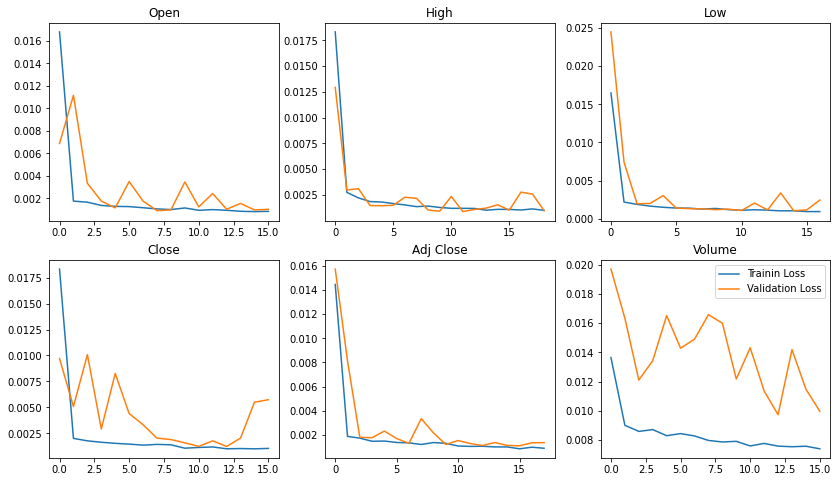

In [285]:
%matplotlib inline
plt.figure(figsize=(14,8))
for i in range(data.shape[1]):
    plt.subplot(2,3,i+1)
    plt.plot(history_list[i].history['loss'], label = 'Trainin Loss')
    plt.plot(history_list[i].history['val_loss'], label = 'Validation Loss')
    plt.title('{}'.format(list(df['org_1'].columns)[i]))

plt.legend()
plt.show()

In [286]:
init_x_data = trainX[-1].reshape(1, test_size_num, 6)
init_y_data = []

for i in model_list:
    y_model = i.predict(init_x_data)
    init_y_data.append(y_model)

1/1 [==============================] - 0s 182ms/step


In [287]:
init_y_data

[array([[0.5036512]], dtype=float32),
 array([[0.52735007]], dtype=float32),
 array([[0.5429125]], dtype=float32),
 array([[0.48078054]], dtype=float32),
 array([[0.51213646]], dtype=float32),
 array([[0.17712538]], dtype=float32)]

In [288]:
init_y_data = np.array(init_y_data)
init_y_data = init_y_data.reshape(1,1,6)
init_y_data.shape

(1, 1, 6)

In [289]:
x_data_prediction = [init_x_data]
y_data_prediction = [init_y_data] 

for i in range(test_data.shape[0]-1):
    temp_x_data = np.vstack((x_data_prediction[i][0][1:], y_data_prediction[i][0][0]))
    temp_x_data = temp_x_data.reshape(1, test_size_num, 6)
    x_data_prediction.append(temp_x_data) 

    y_pred_data_layer = []

    for j in model_list:
        y_pred_data = j.predict(temp_x_data)
        y_pred_data_layer.append(y_pred_data)


    y_pred_data_layer = np.array(y_pred_data_layer)
    y_pred_data_layer = y_pred_data_layer.reshape(1,1,6)
    y_data_prediction.append(y_pred_data_layer)

1/1 [==============================] - 0s 16ms/step


In [290]:
y_data_prediction_array = np.array(y_data_prediction) 
y_data_prediction_array.shape

(10, 1, 1, 6)

In [291]:
y_prediction_final = y_data_prediction_array[:,0,0,3]

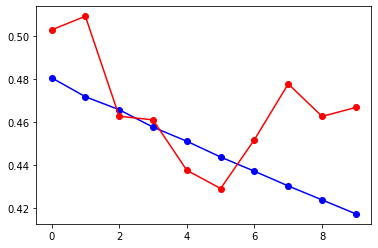

In [292]:
%matplotlib inline
plt.plot(y_prediction_final, 'bo-')
plt.plot(test_list[3], 'ro-')

In [293]:
loss = np.mean(abs(test_list[3] - y_prediction_final), axis=-1)
loss

0.02446922067977615